### Load Image

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import skfuzzy as fuzz
from pylab import *


img = cv2.imread(r'C:\Users\Josh\Desktop\DATASET\THESIS\Printed Symbols\treble.jpg')


print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()



(100, 100, 3)


<Figure size 640x480 with 1 Axes>

### Horizontal Projection and Binarization

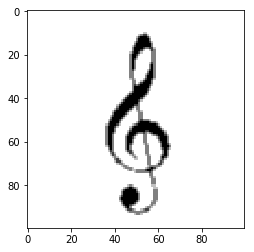

True

In [2]:

ret,noStaffNote = cv2.threshold(img,60,255,cv2.THRESH_BINARY)



noStaffNote = cv2.blur(noStaffNote,(2,2))

plt.imshow(noStaffNote,cmap='gray')
plt.show()

cv2.imwrite(r"C:\Users\Josh\Desktop\DATASET\THESIS\Test.jpg", noStaffNote)




### Canny Edge Detector

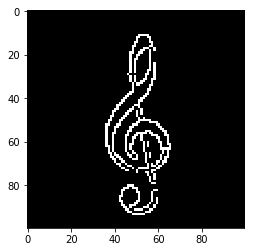

11.7045


In [3]:
edges = cv2.Canny(noStaffNote,100,200)
    
plt.imshow(edges,cmap='gray')
plt.show()

type(edges)
edges.flatten()

unique, counts = np.unique(edges, return_counts=True)
dict(zip(unique, counts))







mean = edges.mean()
print(mean)

### Getting the Edges

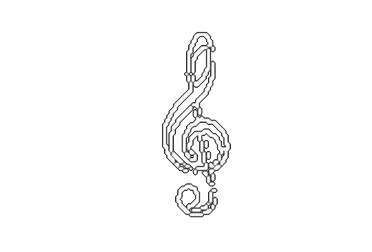

<Figure size 432x288 with 0 Axes>

In [4]:
# create a new figure
figure()
gray()
# show contours with origin upper left corner
contour(edges, origin='image')
axis('equal')
axis('off')


figure()
features = array(edges)



show()

### Detecting the Transition Values

#### This code snippet here takes x1, x2, x3 values of the image provided.

x1: -8, x2: 10, x3: -14
x1: -8, x2: 10, x3: -10
x1: -7, x2: 9, x3: -14
x1: -8, x2: 10, x3: -8
x1: -12, x2: 17, x3: -3
x1: -12, x2: 14, x3: -11
x1: -7, x2: 11, x3: -6
x1: -9, x2: 14, x3: -5
x1: -9, x2: 12, x3: -23
x1: -7, x2: 11, x3: -6
x1: -7, x2: 11, x3: -7
x1: -6, x2: 8, x3: -12
x1: -9, x2: 11, x3: -9
x1: -7, x2: 10, x3: -8
x1: -11, x2: 13, x3: -6
x1: -8, x2: 11, x3: -6
x1: -10, x2: 14, x3: -6
x1: -5, x2: 9, x3: -11
x1: -7, x2: 9, x3: -11
x1: -7, x2: 9, x3: -4
x1: -8, x2: 12, x3: -4
x1: -8, x2: 10, x3: -12
x1: -9, x2: 11, x3: -13
x1: -7, x2: 9, x3: -5
x1: -7, x2: 10, x3: -10
x1: -6, x2: 8, x3: -16
x1: -11, x2: 15, x3: -9


##### LO AND HIGH VALUES #####
Highest X1: -5
Lowest X1: -12

Highest X2: 17
Lowest X2: 8

Highest X3: -3
Lowest X3: -23


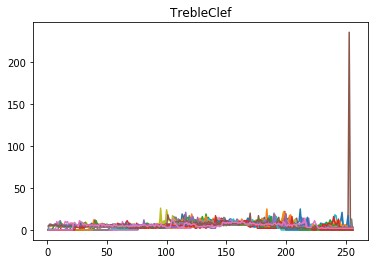

In [78]:
lowest_x1 = 0
lowest_x2 = 0
lowest_x3 = 0
highest_x1 = 0
highest_x2 = 0
highest_x3 = 0

first_run = 1


for rep in range(1, 28):
    arrX = [1]
    arrY = [None]
    arrReading = [None]

    #for transition detection
    local_max = 0
    local_min = 0
    pr = 0 # previous reading
    direction = "+"
    x = [0] # transition magnitude
    #=======================#

    #rep = edges;
    foldername = "TrebleClef"
    path = "C:\\Users\\Josh\\Desktop\\Thesis Data\\Extracted\\" + foldername +"\\testing\\"
    #TO MAKE THINGS EASIER, THE IMAGES ARE NAMED 1,2,3,4... etc. 
    
    imgName = path + str(rep) +".jpg"
    img = cv2.imread(imgName, 0)
    edges = cv2.Canny(img, 100, 200)


    z = 0

    for a in edges:
        y = 0
        z += 1
        arrX.append(z)

        for b in a:
            if b >= 254:
                y += 1

        arrY.append(y)

    arrX.remove(1)
    arrY.remove(None)

    plt.plot(arrX, arrY)
    plt.title(foldername)
    #plt.show()

    #DETECTING THE TRANSITION VALUES
    for cr in arrY:
        if cr != pr:
            if cr > (pr+2):
                if direction == "+":
                    if cr > local_max:
                        local_max = cr
                        pr = cr
                    else:
                        pr = cr
                else:
                    direction = "+"
                    x.append(local_min + local_max)
                    local_max = cr
                    pr = cr
            else:
                if cr > pr:
                    if direction == "+":
                        local_max = cr
                        pr = cr
                    else:
                        pr = cr
                else:
                    if cr < (pr-2):
                        if direction == "-":
                            if cr < local_max:
                                local_min = cr
                                pr = cr
                            else:
                                pr = cr
                        else:
                            direction = "-"
                            x.append(0 - (local_max - local_min))
                            local_min = cr
                            pr = cr
                    else:
                        if direction == "-":
                            local_min = cr
                            pr = cr
                        else:
                            pr = cr
        else:
            pr = cr
            
    try:
        #print("x1: " + str(x[1]) + ", x2: " + str(x[2]) + ", x3: " + str(x[3]))
        print("x1: " + str(x[1]) + ", x2: " + str(x[2]) + ", x3: " + str(x[3]))
        
        
    except IndexError:
        print("Transition Values less than expected")
        pass
        
        
        
    
    
    
    #============== This code here will take the lowest x and the highest x ===========#
    try:
        current_x1 = x[1]
        current_x2 = x[2]
        current_x3 = x[3]
    except IndexError:
        pass

    #pseudocode
    #if the current x1 is bigger than the previous x1, then that's the highest, otherwise, 
    #if the current x1 is lower than the lowest x1, then that's the lowest
    
    if(first_run == 1):
        highest_x1 = current_x1
        lowest_x1 = current_x1
        highest_x2 = current_x2
        lowest_x2 = current_x2
        highest_x3 = current_x3
        lowest_x3 = current_x3
        
        first_run = 0
    else:
        if(current_x1 >= highest_x1):
            highest_x1 = current_x1
        elif(current_x1 <= lowest_x1):
            lowest_x1 = current_x1
            
        if(current_x2 >= highest_x2):
            highest_x2 = current_x2
        elif(current_x2 <= lowest_x2):
            lowest_x2 = current_x2

        if(current_x3 >= highest_x3):
            highest_x3 = current_x3
        elif(current_x3 <= lowest_x3):
            lowest_x3 = current_x3

    
    
    
    
    
    
    
    

print()
print()   
print("##### LO AND HIGH VALUES #####")
print("Highest X1: " + str(highest_x1))
print("Lowest X1: " + str(lowest_x1))
print()
print("Highest X2: " + str(highest_x2))
print("Lowest X2: " + str(lowest_x2))
print()
print("Highest X3: " + str(highest_x3))
print("Lowest X3: " + str(lowest_x3))




#===================#




## Describing the Fuzzy System

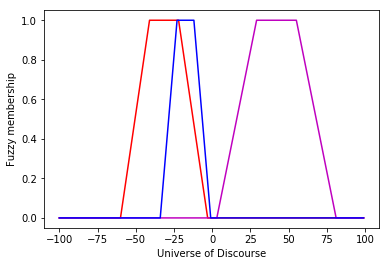

In [76]:
### THIS PART IS STILL WIP
### I don't know if the graph should look like this.
### 


# Generate universe of discourse functions
universe = np.arange(-100,  100, 1)


# Membership functions for all Xs (FOUND IN THE CSV FILE)
x1 = fuzz.trapmf(universe, [-60, -41,-22,-3])
x2 = fuzz.trapmf(universe, [3, 29, 55, 81])
x3 = fuzz.trapmf(universe, [-34, -23,-12,-1])
#mid = fuzz.trapmf(universe, [-60,-22,29,81])


# Visualize membership functions for temperature
fig, ax = plt.subplots()


#ax.plot(universe, x1, 'r', universe, x2, 'm', universe, x3, 'b', universe, mid, 'g')
ax.plot(universe, x1, 'r', universe, x2, 'm', universe, x3, 'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Universe of Discourse')
ax.set_ylim(-0.05, 1.05);



50.739% treble clef


-1.7114707371835748e+16

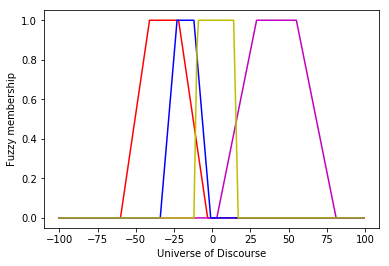

In [89]:
fig, ax = plt.subplots()

# Membership for a handwritten treble clef that is not part of the training data
trebleX1 = fuzz.trapmf(universe, [-12, -9.667,14,17])
trebleX2 = fuzz.trapmf(universe, [8, 11,14,17])
trebleX3 = fuzz.trapmf(universe, [-23,-16.333,-9.667,-3])

#

ax.plot(universe, x1, 'r', universe, x2, 'm', universe, x3, 'b', universe, trebleX1, "y")
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Universe of Discourse')
ax.set_ylim(-0.05, 1.05);


#Fuzzy Relations
R1 = fuzz.classic_relation(x1, trebleX1)
R2 = fuzz.classic_relation(x2, trebleX2)
R3 = fuzz.classic_relation(x3, trebleX3)

a = fuzz.defuzz(R1, R3, 'centroid') 
a = a * 100
a = round(a,3)

print(str(a) + "% treble clef")
fuzz.defuzz(R3, R1, 'centroid') 


#ax.plot(universe, x1, 'r', universe, x2, 'm', universe, x3, 'b', universe, treble, "y")
#ax.set_ylabel('Fuzzy membership')
#ax.set_xlabel('Universe of Discourse')
#ax.set_ylim(-0.05, 1.05);




In [8]:
a = fuzz.defuzz(R3, R1, 'centroid') 
a = a * 100
a = round(a,3)

print(str(a) + "% treble clef")

50.199% treble clef
